TODO:

* Explore the data to undercover discrepensies and patterns
  * use the previous assignments and weeks plots to help

* Choose an interesting data story
  * time of day and day of week crime rates
  * neighborhood crime rates and types

* Homepage showing NYPD safe areas green and unsafe areas red for a given time period
  * helps guide average NYC citizen to safer travel routes/areas



Feedback:

D3 plots!
Focus on examples from A to B and story telling 
Socio-economico overlays
- NO Machine Learning


Maps - City maps change over time - make sure the map is true to reality - e.g. the island in San Francisco was not always there

Remember to add something interesting in between charts

What if the police made a mistake? 

New YOrk police has lots of problems - look at trneds and Public opinion
- Has the Global/National opinion changed over time?
- Cultural association on the police

Low scale
- what are the complaints about 
- Are there some valid
- Some invalid complaints - specific person, story or motive to fake a complaint

Make sure to guide - by adding explanations and analysis


Socio-economic factors - how do they affect the crime rate - median income and unemployment rate

Look at NaN values - should we remove or fill them in with a value (mean, median, mode)

In [5]:
# Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import os

# Re the NYPD policing data
cwd = os.getcwd()
print(cwd)
parent_dir = os.path.dirname(cwd)
print(parent_dir)
# path 
fpath = "/Users/benjaminfazal/socialdata2024/Ass_final"

filename = 'NYPD_Complaint.csv'

df = pd.read_csv(fpath + "/NYPD_Complaint.csv")
#focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

/Users/benjaminfazal/SocialData_FinalProject
/Users/benjaminfazal


In [6]:
print(df.head())

    CMPLNT_NUM  ADDR_PCT_CD   BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0    269235387         42.0     BRONX   06/03/2023     01:00:00          NaN   
1    262102261         43.0     BRONX   01/18/2023     14:00:00          NaN   
2    267972239         43.0     BRONX   05/07/2023     00:15:00          NaN   
3  263141402H1          NaN  BROOKLYN   02/06/2023     10:16:00          NaN   
4  269307857H1          NaN  BROOKLYN   06/04/2023     00:20:00          NaN   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT        JURIS_DESC  ...  PARKS_NM  \
0       (null)        COMPLETED     (null)  N.Y. POLICE DEPT  ...    (null)   
1       (null)        COMPLETED     (null)  N.Y. POLICE DEPT  ...    (null)   
2       (null)        COMPLETED     (null)  N.Y. POLICE DEPT  ...    (null)   
3       (null)        COMPLETED     (null)  N.Y. POLICE DEPT  ...    (null)   
4       (null)        COMPLETED     (null)  N.Y. POLICE DEPT  ...    (null)   

   PD_CD                    PD_DESC         

In [7]:
print(df.columns)
# Total number of crimes
print('Total number of crimes', len(df)) # over 2 million

# Count nan values in total
print('Number of nan values in total', df.isna().sum().sum())

# Various categories of crimes
print('Number of categories', len(df['OFNS_DESC'].unique()))

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PARKS_NM', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'Lat_Lon',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')
Total number of crimes 555117
Number of nan values in total 35254
Number of categories 64


OFNS_DESC
PETIT LARCENY                     110081
HARRASSMENT 2                      83954
ASSAULT 3 & RELATED OFFENSES       58322
GRAND LARCENY                      50514
CRIMINAL MISCHIEF & RELATED OF     42339
                                   ...  
DISRUPTION OF A RELIGIOUS SERV         2
FORTUNE TELLING                        1
HOMICIDE-NEGLIGENT-VEHICLE             1
OTHER TRAFFIC INFRACTION               1
LOITERING                              1
Name: count, Length: 64, dtype: int64


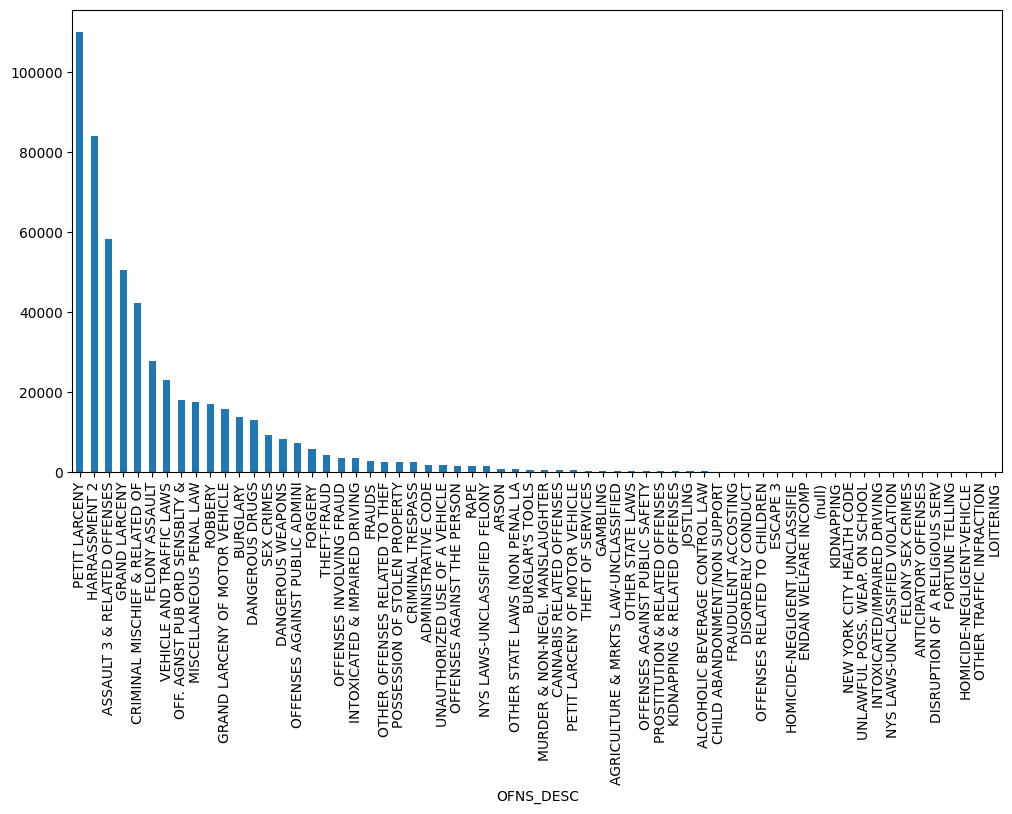

In [8]:
#OFNS_DESC
print(df['OFNS_DESC'].value_counts())
#plot bar
plt.figure(figsize=(12, 6))
df['OFNS_DESC'].value_counts().plot(kind='bar')
plt.show()


Index(['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
       'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF', 'FELONY ASSAULT',
       'VEHICLE AND TRAFFIC LAWS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'MISCELLANEOUS PENAL LAW', 'ROBBERY', 'GRAND LARCENY OF MOTOR VEHICLE',
       'BURGLARY', 'DANGEROUS DRUGS', 'SEX CRIMES', 'DANGEROUS WEAPONS',
       'OFFENSES AGAINST PUBLIC ADMINI'],
      dtype='object', name='OFNS_DESC')


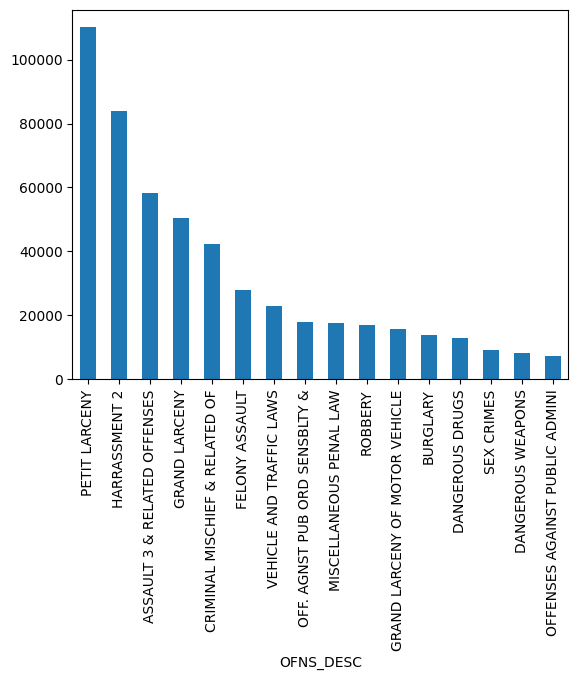

In [9]:
# save the 12 most common crimes as focus_crimes
focuscrimes = df['OFNS_DESC'].value_counts().head(16).index
print(focuscrimes)

plot = df[df['OFNS_DESC'].isin(focuscrimes)]['OFNS_DESC'].value_counts().plot(kind='bar')
plt.show()

CMPLNT_FR_TM
12:00:00    12764
15:00:00    10422
18:00:00     9881
17:00:00     9586
20:00:00     9152
            ...  
05:39:00       23
05:46:00       23
06:51:00       22
05:41:00       22
05:59:00       22
Name: count, Length: 1440, dtype: int64


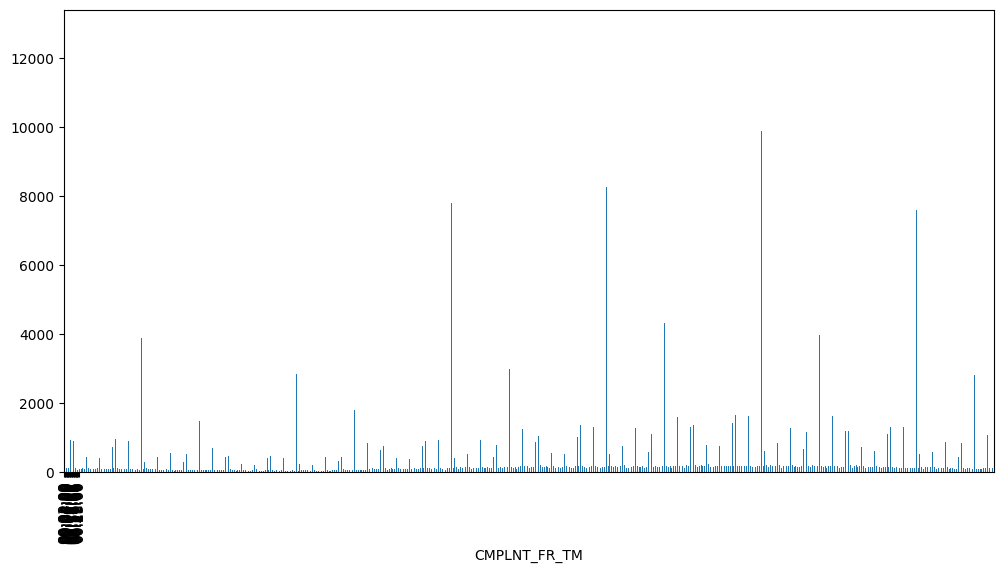

CMPLNT_FR_DT
06/01/2023    1773
05/03/2023    1751
10/06/2023    1750
09/01/2023    1749
07/01/2023    1736
              ... 
11/13/2013       1
06/10/2018       1
06/30/2003       1
04/20/2018       1
08/25/2020       1
Name: count, Length: 2148, dtype: int64


In [10]:
#cmplnt_fr_tm show complaint occurence time
print(df['CMPLNT_FR_TM'].value_counts())
#plot occurences over 24 hours - sort by time and x-ticks for each hour
plt.figure(figsize=(12, 6))
df['CMPLNT_FR_TM'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(0, 24, 1))
plt.show()

# check complaint occurence date
print(df['CMPLNT_FR_DT'].value_counts())

# check complaint 

KeyError: 'Category'

findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.


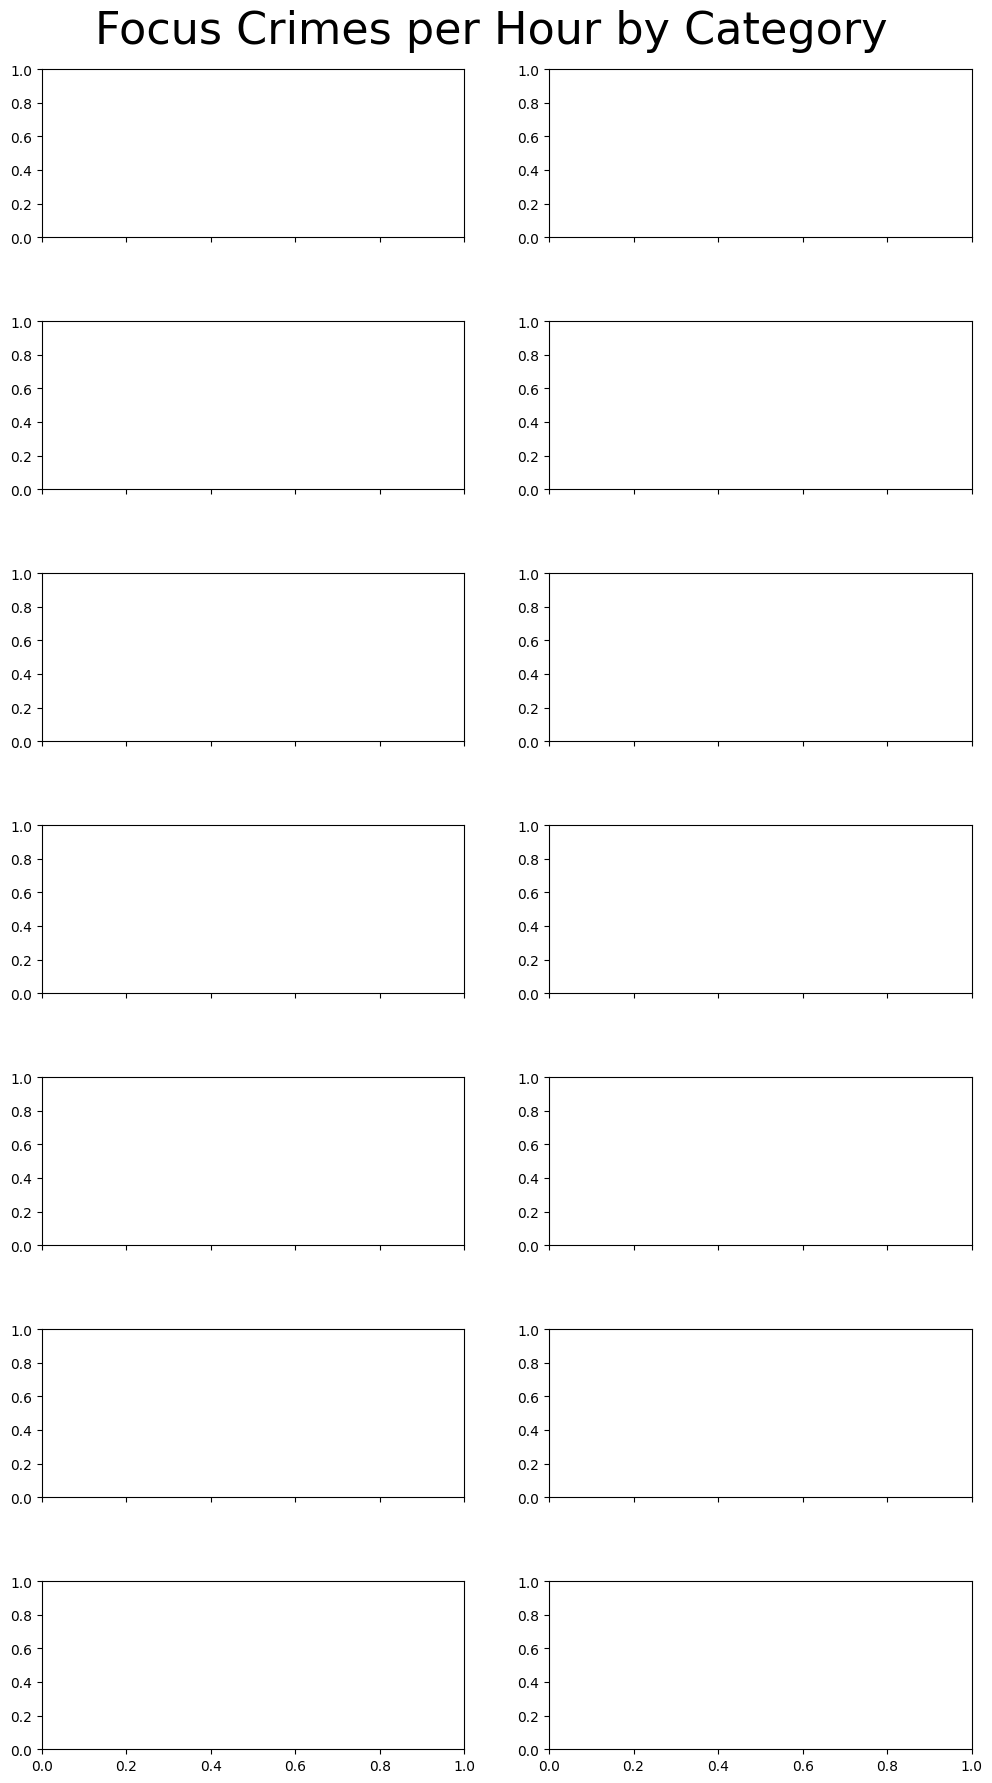

In [11]:
### 24-hour Plot ###
sns.set_palette('viridis') # 24 hours is more sequential than categorical therefore viridis is good
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 20), sharex=True)
fig.suptitle('Focus Crimes per Hour by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32)
fig.subplots_adjust(top=0.95, hspace=0.5)
hour_names = [f'{i}' for i in range(24)]

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    # Convert 'Time' to datetime and extract hour
    x = pd.to_datetime(df[df['Category'] == crime]['Time'], format='%H:%M').dt.hour
    x = x.astype('category').cat.set_categories(range(24), ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=range(24), ax=ax, palette='viridis')

    # annotate the the max count on the plot
    max_count = y.max()
    max_hour = y.idxmax() # get the day with max count
    ax.text(max_hour+0.1, max_count - max_count/11, max_count, ha='center', va='center', fontsize=9, color='white', rotation=90) # place annotation just under top of max bar

    ax.set_xlabel("Hour of the day" if i >= len(focuscrimes) - 2 else "")  # Only label bottom plot of each column
    ax.set_ylabel("Crime Count")
    ax.set_xticklabels(hour_names, rotation=0)  # Set hour names as x-tick labels
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6, -2)))  # Adjust y-ticks
    ax.set_title(crime, fontdict={'fontname': 'Franklin Gothic Medium', 'fontsize': 14})
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()

In [ ]:
# Load the GeoJSON data
geojson = "Exam Project/new-york-city.boroughs.geojson"
with open(geojson) as f:
   districts = json.load(f)

# Get data for the focuscrimes
data = df[df['OFNS_DESC'].isin(focuscrimes)]

# filter the focus_data by Grand Larceny
grand_larceny = data[data['OFNS_DESC'] == 'GRAND LARCENY']

# Aggregate data by District and DayOfWeek
district_day_counts = grand_larceny.groupby(['', 'DayOfWeek']).size().reset_index(name='Counts')

# Create a df with counts by district on Fridays
Fridays = district_day_counts[district_day_counts['DayOfWeek'] == 'Friday']

Fridays = district_day_counts
# rename pdDistrict to District
Fridays = Fridays.rename(columns={'PdDistrict': 'District'})
# normalize the counts
Fridays['Counts Normalized'] = (Fridays['Counts'] - Fridays['Counts'].min()) / (Fridays['Counts'].max() - Fridays['Counts'].min())


# Plot the geo data on a map using plotly
fig = px.choropleth_mapbox(Fridays, geojson=districts, locations='District', color='Counts Normalized',
                           color_continuous_scale="Viridis",
                           range_color=(Fridays['Counts Normalized'].min(), Fridays['Counts Normalized'].max()),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5, labels={'Counts':'Normalized Counts'})
                          
fig.update_layout(
    title_text="<b>Incident Count of Drunk Driving on All days of the week by District<b>",
    title_x=0.5,
    title_y=0.9,
    title_xanchor='center',
    title_yanchor='top',
    title_font=dict(
        size=24,
        family="Arial, sans-serif"
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()